# 1.Business Objectives
This project aims to analyze the Indian Houses for Rent dataset in order to extract valuable business insights and build predictive models that support both property owners and tenants. The main objectives are:


1.   Fair Rent Prediction:
Build a model to predict the rental price of a house/apartment based on features such as BHK, size, floor, locality, furnishing status, and number of bathrooms.
2.   Market Insights & Trends:
Identify pricing patterns across different cities and localities, and analyze how features like furnishing status or area type affect rent.
3.   Tenant–Property Matching:
Use tenant preferences to recommend the most suitable properties, improving the match between owners and tenants.
4.   Demand Analysis:Study how posting date, location, and property features influence the demand (likelihood of a property being rented quickly).


# 2. Get the data

In [227]:
# import important liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [228]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d cat-reloaded-data-science/indian-houses-for-rent

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/cat-reloaded-data-science/indian-houses-for-rent
License(s): apache-2.0
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 159MB/s]


In [229]:
!unzip /content/indian-houses-for-rent.zip -d /content/

Archive:  /content/indian-houses-for-rent.zip
  inflating: /content/Indian_House_Rent_Dataset.csv  


In [230]:
# After we preview the column values we see many values so we will use fuzzywuzzy library to case matching
!pip install rapidfuzz

In [231]:
!pip install -U scikit-learn

# 3.Exploring the data

In [232]:
df = pd.read_csv("/content/Indian_House_Rent_Dataset.csv")
df.head()     # To show the frist five raws

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
0,NaN,2.0,1100.0,NaN,Super Area,Bandel,India-! Kolkata,Unfurnished,Bach^elors/Fam.ily,2.0,Contact Owner,10000
1,2022-05-13,2.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",India-! Kolkata,Semi-Furnished,Bachelors\/Family*,NaN,NaN,20000
2,2022-05-16,2.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,India-- Kolkata,Semi-Furnished,NaN,1.0,Contact Owner,17000
3,2022-07-04,2.0,800.0,1 out of 2,Super Area,NaN,NaN,Unfurnished,Bachel]ors/F@amily,1.0,NaN,10000
4,2022-05-09,2.0 room,850.0,1 out of 2,Carpet Area,South Dum Dum,India-^ Kolkata,Unfurnished,Bache[lors&,1.0,Contact Owner,7500


In [233]:
# Show the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4084 non-null   object
 1   BHK                3963 non-null   object
 2   Size               3826 non-null   object
 3   Floor              3960 non-null   object
 4   Area Type          3804 non-null   object
 5   Area Locality      4146 non-null   object
 6   City               4091 non-null   object
 7   Furnishing Status  4042 non-null   object
 8   Tenant Preferred   4094 non-null   object
 9   Bathroom           4205 non-null   object
 10  Point of Contact   4137 non-null   object
 11  Rent               4746 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 445.1+ KB


In [234]:
df.dtypes

,0
Posted On,object
BHK,object
Size,object
Floor,object
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object
Bathroom,object


In [235]:
df.duplicated().sum() # To show the duplicated raws

np.int64(0)

In [236]:
df.isna().sum() / len(df) *100 # Show the persentage of nan values

,0
Posted On,13.948588
BHK,16.498104
Size,19.384745
Floor,16.561315
Area Type,19.848293
Area Locality,12.642225
City,13.801096
Furnishing Status,14.833544
Tenant Preferred,13.737885
Bathroom,11.399073


## Cleaning

### BHK column

In [237]:
df['BHK'].unique()                                    # to show the unique values of the column to explore the column values

array(['2.0', '2.0 room', '1.0', nan, '3.0', '1.0 room', '6.0', '4.0',
       '3.0 room', '5.0', '5.0 room', '4.0 room', '6.0 room'],
      dtype=object)

In [238]:
# The BHK column has a digits and strings so we will extract only digits from it
df['BHK'] = df['BHK'].str.extract(r'(\d+)')          # Extract the digits and remove the strings
df['BHK'] = pd.to_numeric(df['BHK'])                 # convet the column to numeric values
df['BHK'].unique()                                   # to show the unique values after cleanig and convert the data type

array([ 2.,  1., nan,  3.,  6.,  4.,  5.])

In [239]:
df['BHK'].value_counts()                             # to show the value counts after the cleaning

,count
BHK,
2.0,1921
1.0,947
3.0,911
4.0,162
5.0,17
6.0,5


### Size column

In [240]:
df['Size'].unique()                                # to show the unique values of the column to explore the column values

array(['1100.0', '800.0', '1000.0', '850.0', '600.0', '700.0', '250.0',
       nan, '1200.0', '400.0', '375.0', '900.0', '1286.0', '2000.0',
       '650.0', '300.0', '1600.0', '355.0', '350.0', '550.0', '500.0',
       '630.0', '270.0', '1500.0', '1068.0', '150.0', '450.0', '720.0',
       '680.0', '950.0', '1800.0', '480.0', '435.0', '1300.0', '1450.0',
       '750.0', '220.0', '20.0', '200.0', '840.0', '740.0', '490.0',
       '280.0', '120.0', '1220.0', '670.0', '240.0', '2200.0', '685.0',
       '44.0', '392.0', '710.0', '1400.0', '160.0', '1250.0', '839.0',
       '230.0', '620.0', '1350.0Square Feet', '723.0', '320.0', '2160.0',
       '1700.0', '130.0', '505.0', '4000.0', '1190.0', '1012.0', '812.0',
       '420.0', '1750.0', '830.0', '1050.0', '960.0', '756.0', '288.0',
       '1600.0Square Feet', '986.0', '322.0', '957.0', '1430.0', '1320.0',
       '650.0Square Feet', '475.0', '550.0Square Feet', '570.0', '460.0',
       '530.0', '850.0Square Feet', '558.0', '175.0', '721.0',

In [241]:
# Size column it seems like the BHK column so we will do the same (extract the digits and remove strings)
df['Size'] = df['Size'].str.extract(r'(\d+)')     # Extract the digits and remove the strings
df['Size'] = pd.to_numeric(df['Size'])            # convet the column to numeric values
df['Size'].unique()                               # to show the unique values after cleanig and convert the data type

array([1100.,  800., 1000.,  850.,  600.,  700.,  250.,   nan, 1200.,
        400.,  375.,  900., 1286., 2000.,  650.,  300., 1600.,  355.,
        350.,  550.,  500.,  630.,  270., 1500., 1068.,  150.,  450.,
        720.,  680.,  950., 1800.,  480.,  435., 1300., 1450.,  750.,
        220.,   20.,  200.,  840.,  740.,  490.,  280.,  120., 1220.,
        670.,  240., 2200.,  685.,   44.,  392.,  710., 1400.,  160.,
       1250.,  839.,  230.,  620., 1350.,  723.,  320., 2160., 1700.,
        130.,  505., 4000., 1190., 1012.,  812.,  420., 1750.,  830.,
       1050.,  960.,  756.,  288.,  986.,  322.,  957., 1430., 1320.,
        475.,  570.,  460.,  530.,  558.,  175.,  721., 2210.,  675.,
       1880.,  640.,  518.,  777., 2308.,  890.,  888.,  275.,  424.,
        610.,  722., 1150.,  470.,  410.,  932.,  560., 3000.,  751.,
        696., 2500.,  715., 1337.,  737.,  760.,  365., 1330., 2600.,
       1783.,  565., 1080.,  825., 1545.,  780.,  695., 1095.,  790.,
        661.,  330.,

### Floor column

In [242]:
df['Floor'].unique()                              # to show the unique values of the column to explore the column values

array([nan, '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 2',
       'Ground out of 3', '2 out of 3', '4 out of 5', '2 out of 2',
       '2 out of 5', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       'Ground out of 6', 'Upper Basement out of 4', 'Ground out of 5',
       '3 out of 5', '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '18 out of 24', '3 out of 7', '17 out of 31', '11 out of 21',
       '14 out of 23', '19 out of 24', '3 out of 21', '8 out of 8',
       '6 out of 12', '4 out of 58', '60 out of 66', '34 out of 48',
       '5 out of 8', '14 out of 40', '5 out of 7', '26 out of 44',
       '1 out of 8', '25 out of 42', '25 out of 41', '53 out of 

The floor column has two parts

*   frist part is the floor number
*   second part is the total floors in the building , so we will create anthor column for total floors

In [243]:
df['Floor_number'] = df['Floor'].str.split(" out of ").str[0]        # Create a column for floor number take the frist part of 'Floor' column
df['Total_floors'] = df['Floor'].str.split(" out of ").str[1]        # Create a column for floor number take the second part of 'Floor' column
df = df.drop(['Floor'],axis=1)                                       # Drop the 'Floor' column because now will be useless

In [244]:
df['Floor_number'].unique()                                          # to show the unique values after cleanig

array([nan, '1', 'Ground', '2', '4', '3', '5', '7', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '19',
       '8', '60', '34', '26', '25', '53', '16', '39', '10', '12', '32',
       '47', '28', '9', '20', '15', '65', '40', '37', '21', '30', '35',
       '22', '44', '41', '46', '27', '48', '50', '24', '29', '23', '36',
       '76', '45'], dtype=object)

In [245]:
# After showing the unique values of 'Floor_number' column we see three values is strings , so we will replace them in numerical values
df['Floor_number'] = df['Floor_number'].replace({"Ground":0,"Upper Basement":-1,"Lower Basement":-2})
df['Floor_number'] = pd.to_numeric(df['Floor_number'])          # To convert the data type for column to numeric value
df['Floor_number'].value_counts()                               # To show the value count

,count
Floor_number,
1.0,981
2.0,801
0.0,766
3.0,423
4.0,224
5.0,133
6.0,75
7.0,58
8.0,58


In [246]:
df['Total_floors'] = pd.to_numeric(df['Total_floors'])          # To convert the data type for column to numeric value
df['Total_floors'].value_counts()

,count
Total_floors,
4.0,791
3.0,766
2.0,721
5.0,346
1.0,282
...,...
54.0,1
52.0,1
85.0,1


### Area type column

In [247]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', nan, 'CARPET AREA', 'SUPER AREA',
       'Built Area'], dtype=object)

In [248]:
# we see there is the same value but in upper case and otherwise
df['Area Type'] = df['Area Type'].str.lower()      # To make all values in lower case
df['Area Type'].value_counts()                     # To show the value count

,count
Area Type,
super area,1978
carpet area,1824
built area,2


### Area Locality column

In [249]:
df['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'K P H B Phase 9', 'Vinayaka Nagar',
       'Godavari Homes, Quthbullapur'], dtype=object)

In [250]:
df['Area Locality'].value_counts()

,count
Area Locality,
Bandra West,34
Gachibowli,27
Electronic City,23
"Miyapur, NH 9",19
Chembur,18
...,...
New Mallepally,1
"Sai Raghavendra Colony, uppal",1
Balapur,1


In [251]:
from rapidfuzz import process, fuzz

# Function to clean a column using fuzzy matching
def clean_column(df, col_name, threshold=90):
    unique_vals = df[col_name].dropna().unique()
    mapping = {}
    visited = set()

    for val in unique_vals:
        if val in visited:
            continue
        # Find similar values
        matches = process.extract(val, unique_vals, scorer=fuzz.ratio, limit=None)
        group = [m[0] for m in matches if m[1] >= threshold]

        # Choose the most frequent value in the dataframe as the canonical one
        canonical = df[df[col_name].isin(group)][col_name].value_counts().idxmax()

        for g in group:
            mapping[g] = canonical
            visited.add(g)

    # Apply mapping and create a cleaned column
    df[col_name ] = df[col_name].map(mapping)
    return df

In [252]:
# Apply the function on 'Area Locality' column
df = clean_column(df,"Area Locality",threshold=80)
df['Area Locality'].value_counts()

,count
Area Locality,
Salt Lake City Sector 2,41
Bandra West,34
Gachibowli,28
Kodambakkam,27
T Nagar,27
...,...
Manneguda,1
Asif Nagar,1
B.S.Maktha,1


### City column

In [253]:
df['City'].unique()

array(['India-! Kolkata', 'India-- Kolkata', nan, 'India-^ Kolkata',
       'India-\\ Kolkata', 'India-% Kolkata', ',-9 Kolkata',
       'India-/ Kolkata', '(-9 Kolkata', '^-9 Kolkata', '--9 Kolkata',
       'India-* Kolkata', 'India-; Kolkata', 'India-. Kolkata',
       '!-9 Kolkata', ':-9 Kolkata', '\\-9 Kolkata', ';-9 Kolkata',
       'India-> Kolkata', '.-9 Kolkata', 'India-@ Kolkata',
       'India-{ Kolkata', 'India-[ Kolkata', 'India-| Kolkata',
       'India-} Kolkata', '"-9 Kolkata', '|-9 Kolkata', "'-9 Kolkata",
       '>-9 Kolkata', 'India-? Kolkata', '}-9 Kolkata', '#-9 Kolkata',
       'India-$ Kolkata', ']-9 Kolkata', 'India-< Kolkata', '$-9 Kolkata',
       'India-] Kolkata', '<-9 Kolkata', 'India-: Kolkata',
       'India-# Kolkata', 'India-+ Kolkata', '+-9 Kolkata',
       'India-& Kolkata', 'India-, Kolkata', '%-9 Kolkata',
       'India-( Kolkata', 'India-_ Kolkata', '@-9 Kolkata', '=-9 Kolkata',
       'India-" Kolkata', '/-9 Kolkata', '_-9 Kolkata', '?-9 Kolkata',


In [254]:
df['City'] = df['City'].str.replace(r'[^a-zA-Z]','',regex=True)       # To remove any strange character
df['City'].unique()

array(['IndiaKolkata', nan, 'Kolkata', 'Mumbai', 'IndiaMumbai',
       'IndiaBangalore', 'Bangalore', 'IndiaDelhi', 'Delhi', 'Chennai',
       'IndiaChennai', 'IndiaHyderabad', 'Hyderabad'], dtype=object)

In [255]:
df['City'] = df['City'].str.split("India").str[1]                     # To remove any 'India' word from the values
df['City'].unique()

array(['Kolkata', nan, 'Mumbai', 'Bangalore', 'Delhi', 'Chennai',
       'Hyderabad'], dtype=object)

In [256]:
df['City'].value_counts()

,count
City,
Mumbai,437
Bangalore,393
Hyderabad,386
Chennai,372
Delhi,237
Kolkata,221


### Furnishing Status column

In [257]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished', nan], dtype=object)

### Tenant Preferred column

In [258]:
df['Tenant Preferred'].unique()

array(['Bach^elors/Fam.ily', 'Bachelors\\/Family*', nan, ...,
       '!Bachelors+/Family', '$Family%', 'Bachelo%rs:'], dtype=object)

In [259]:
df['Tenant Preferred'].value_counts()

,count
Tenant Preferred,
Bachelors/+Fa.mily,2
B:achel|ors,2
Bachelor.s/Family|,2
Bachelors/Fa(mil\y,2
Bachel{ors@/Family,2
...,...
"Bache!lors/F,amily",1
Bach/e+lors/Family,1
"Bachelor/s/Famil,y",1


In [260]:
import re
df['Tenant Preferred'] = df['Tenant Preferred'].apply(
    lambda x: re.sub(r'[^A-Za-z\s/]', '', str(x)).strip()
)
df['Tenant Preferred'].value_counts()

,count
Tenant Preferred,
Bachelors/Family,2760
Bachelors,677
nan,652
Family,376
Bachelors//Family,24
Bachelors/Fami/ly,17
Bachelors/Fam/ily,16
Bachel/ors/Family,16
Bachelor/s/Family,15


In [261]:
df = clean_column(df, "Tenant Preferred", threshold=90)     # Using the clean fuction to clean and matching values of the column
df['Tenant Preferred'] = df['Tenant Preferred'].replace("nan",np.nan)
df['Tenant Preferred'].value_counts()

,count
Tenant Preferred,
Bachelors/Family,2973
Bachelors,722
Family,399


### Bathroom column

In [262]:
df['Bathroom'].unique()

array(['2.0', nan, '1.0', '1.0 Bathrooms', '2.0 Bathrooms', '3.0', '4.0',
       '5.0', '3.0 Bathrooms', '5.0 Bathrooms', '6.0', '4.0 Bathrooms',
       '7.0', '10.0'], dtype=object)

In [263]:
df['Bathroom'] = df['Bathroom'].str.extract(r'(\d+)')
df['Bathroom'] = pd.to_numeric(df['Bathroom'])
df['Bathroom'].value_counts()

,count
Bathroom,
2.0,2041
1.0,1316
3.0,645
4.0,140
5.0,51
6.0,8
7.0,3
10.0,1


### Point of contract column

In [264]:
df['Point of Contact'].unique()

array(['Contact Owner', nan, 'Contact Agent'], dtype=object)

In [265]:
# After cleaning insert the information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4084 non-null   object 
 1   BHK                3963 non-null   float64
 2   Size               3826 non-null   float64
 3   Area Type          3804 non-null   object 
 4   Area Locality      4146 non-null   object 
 5   City               2046 non-null   object 
 6   Furnishing Status  4042 non-null   object 
 7   Tenant Preferred   4094 non-null   object 
 8   Bathroom           4205 non-null   float64
 9   Point of Contact   4137 non-null   object 
 10  Rent               4746 non-null   int64  
 11  Floor_number       3960 non-null   float64
 12  Total_floors       3957 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 482.1+ KB


# 4. EDA

In [266]:
num_cols = df.select_dtypes(include=['int','float']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [267]:
def num_plot(column):
  fig, ax = plt.subplots(1, 2, figsize = (8,6))
  fig.suptitle(f"Distribution of {column}", fontsize=16, fontweight='bold')
  sns.histplot(x=column, data=df, bins = 50,kde=True, edgecolor='black', ax=ax[0],palette = "Set2")
  ax[0].set_title(f"Histogram of {column}")
  sns.boxplot(x=column, data=df, ax=ax[1])
  ax[1].set_title(f"Boxplot of {column}")
  plt.tight_layout()
  plt.show()

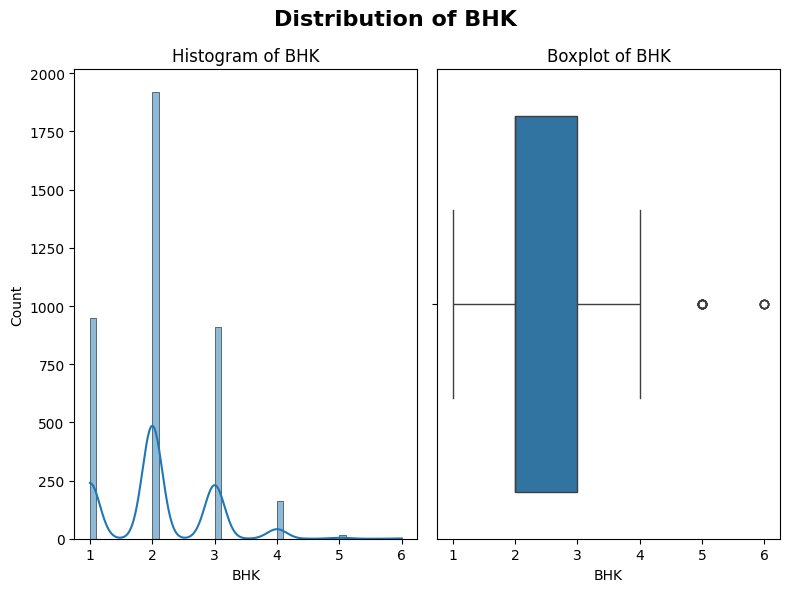

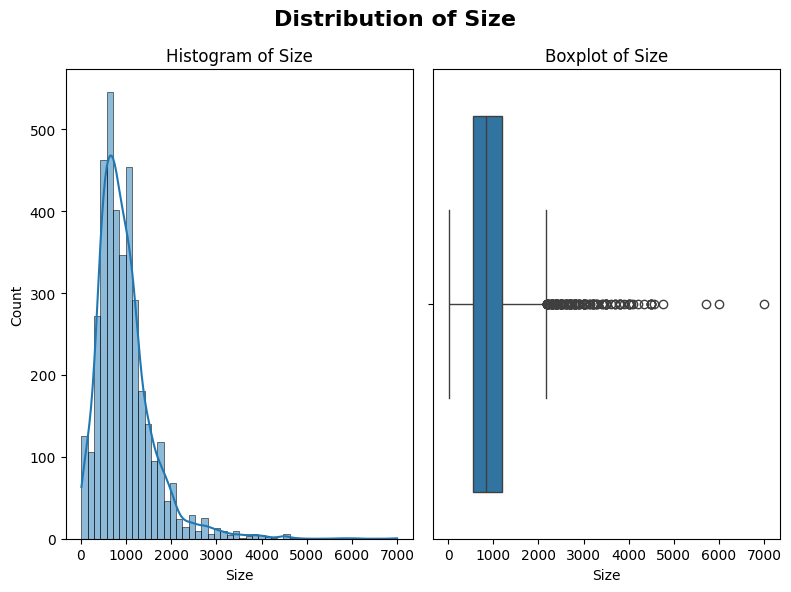

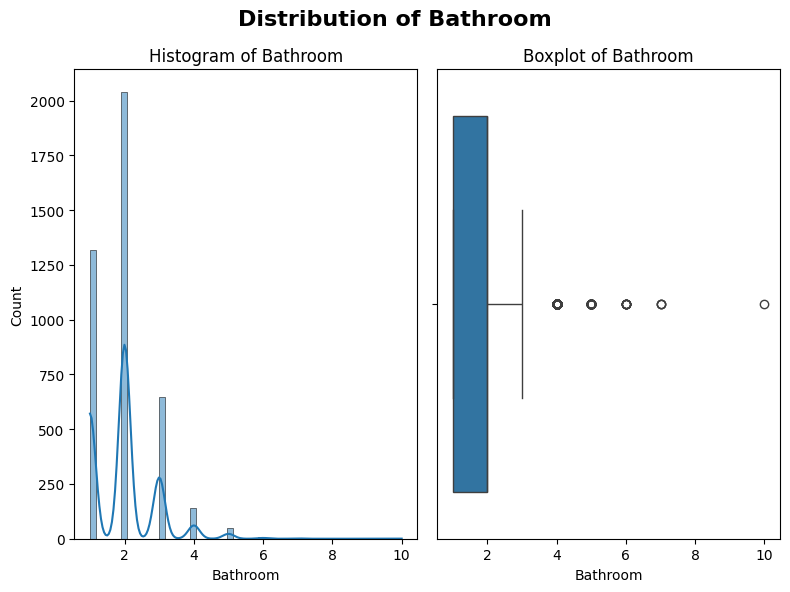

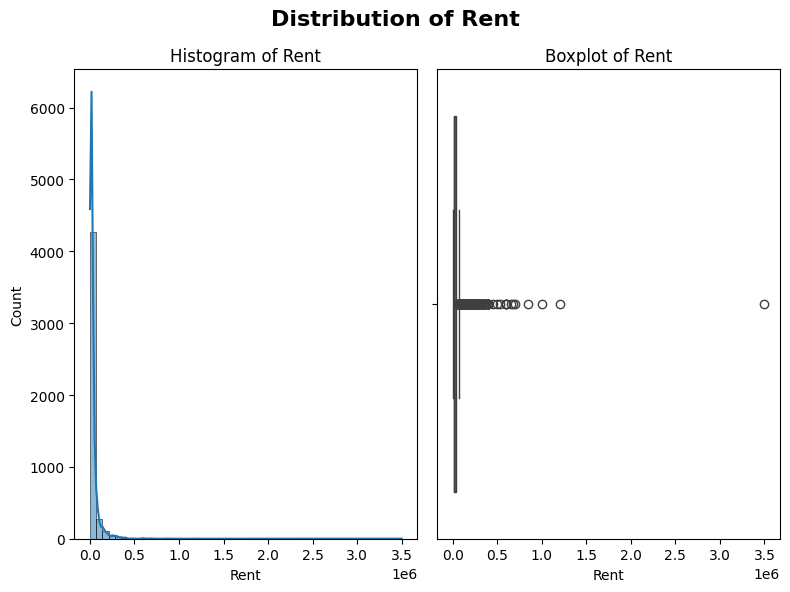

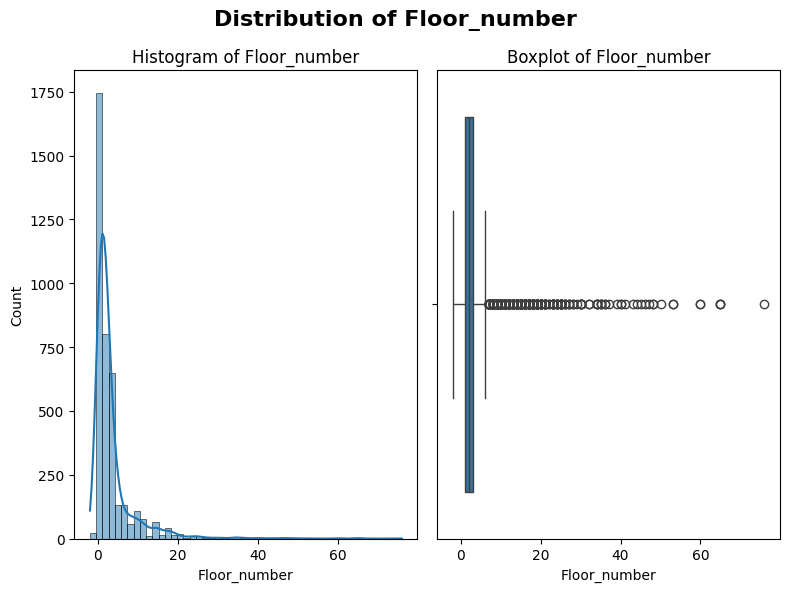

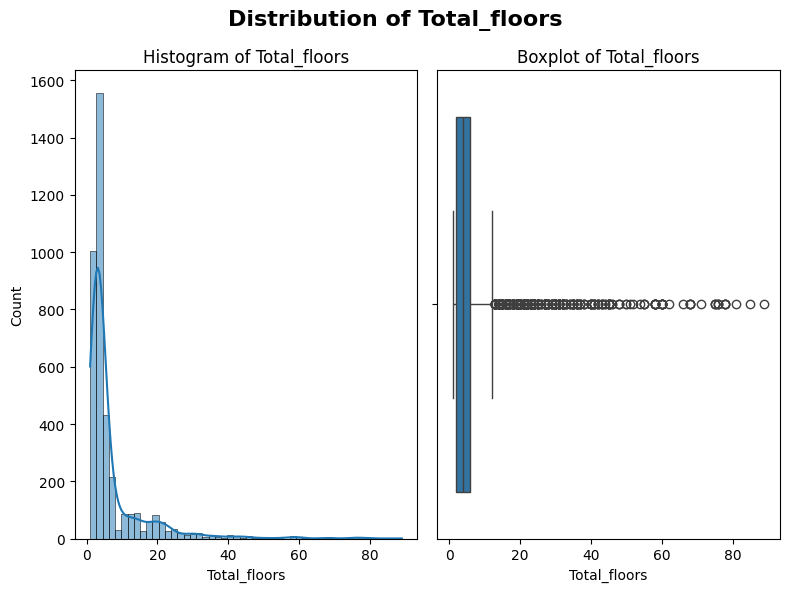

In [268]:
for column in num_cols:
  num_plot(column)

In [269]:
def cat_plot(column):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle(f"Distribution of {column}", fontsize=16, fontweight='bold')
    sns.countplot(x=column, data=df, edgecolor='black', ax=ax,palette = "Set2")
    ax.set_title(f"Count of {column}")
    plt.tight_layout()
    plt.show()

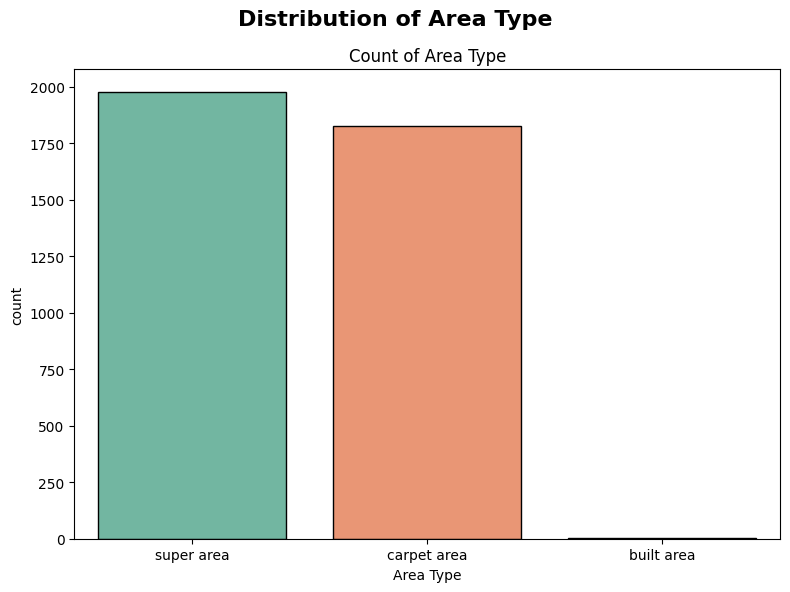

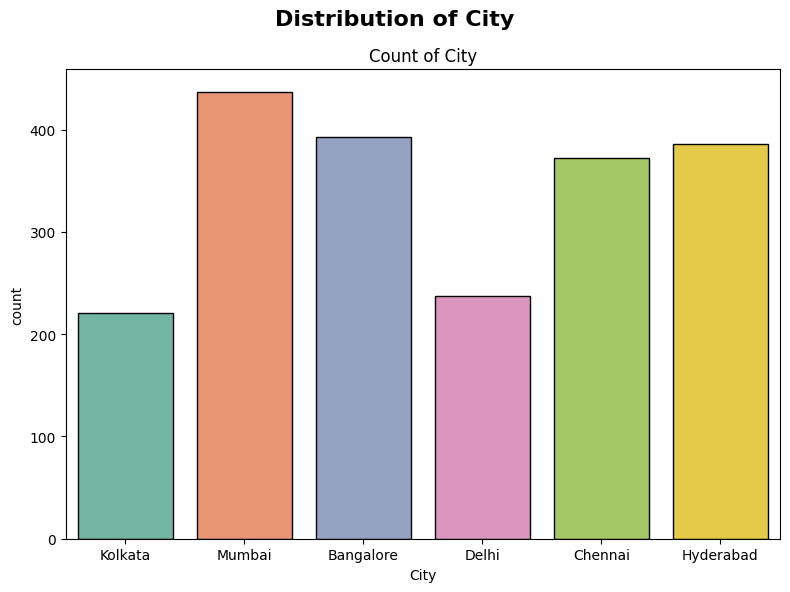

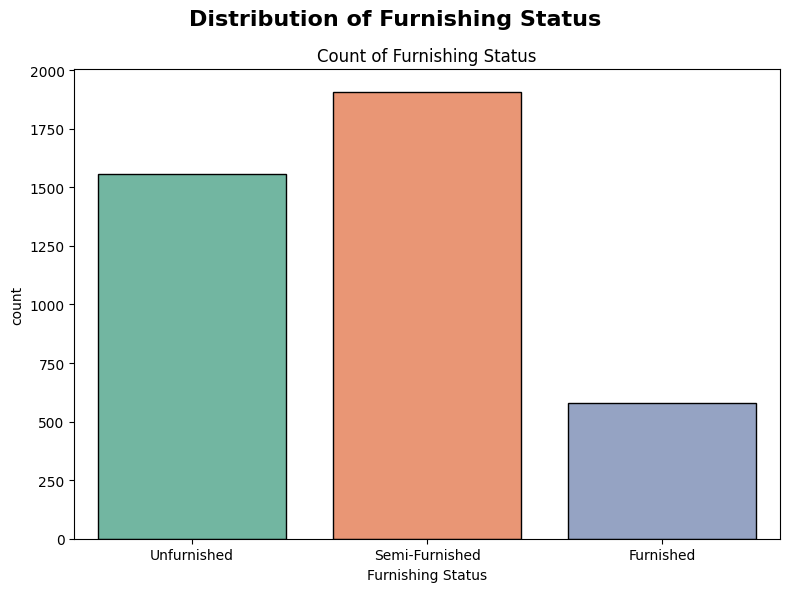

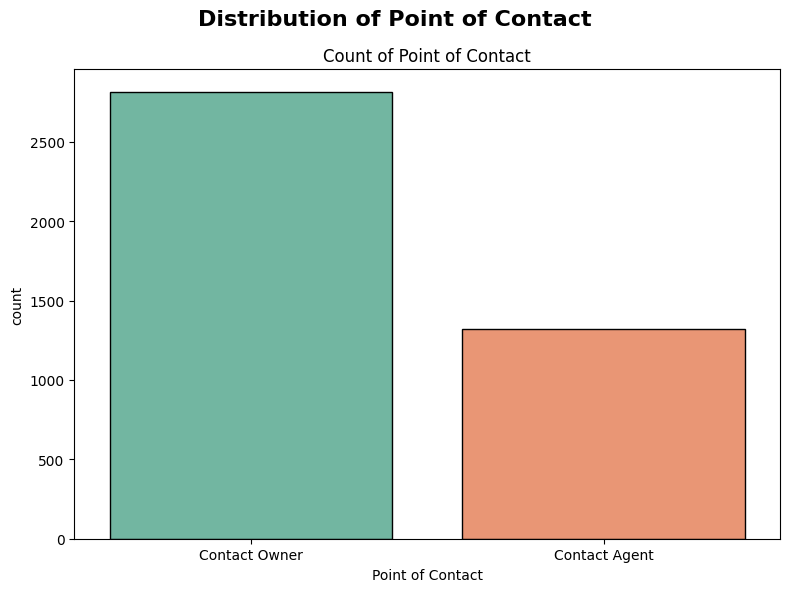

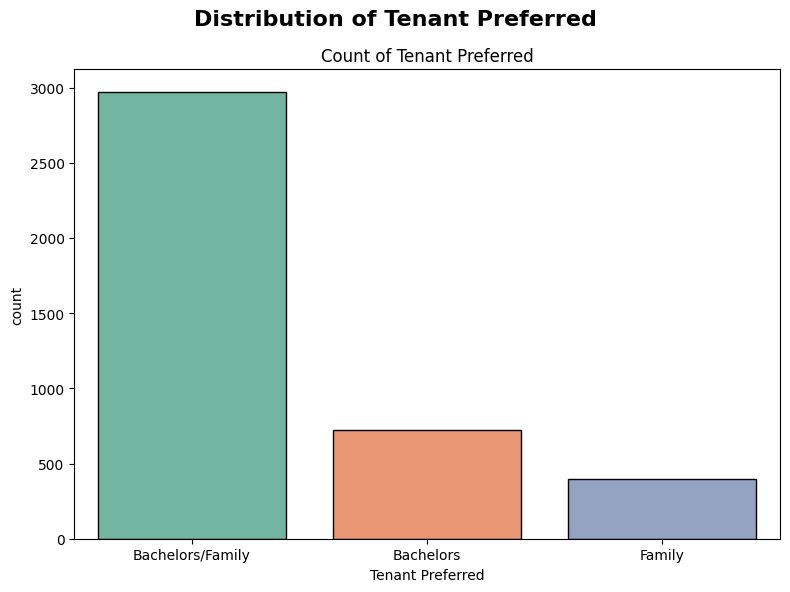

In [270]:
for column in cat_cols.difference(['Posted On','Area Locality']):
  cat_plot(column)

Display the distribution of category columns with the rent column

In [271]:
def cat_with_rent(column):
  data = df.groupby(column)['Rent'].median().reset_index()
  fig, ax = plt.subplots(figsize=(8,6))
  fig.suptitle(f"Distribution of {column} with Rent median", fontsize=16, fontweight='bold')
  sns.barplot(x=column,y='Rent', data=data, edgecolor='black', ax=ax,palette = "Set2")
  ax.set_title(f"Count of {column}")
  plt.tight_layout()
  plt.show()

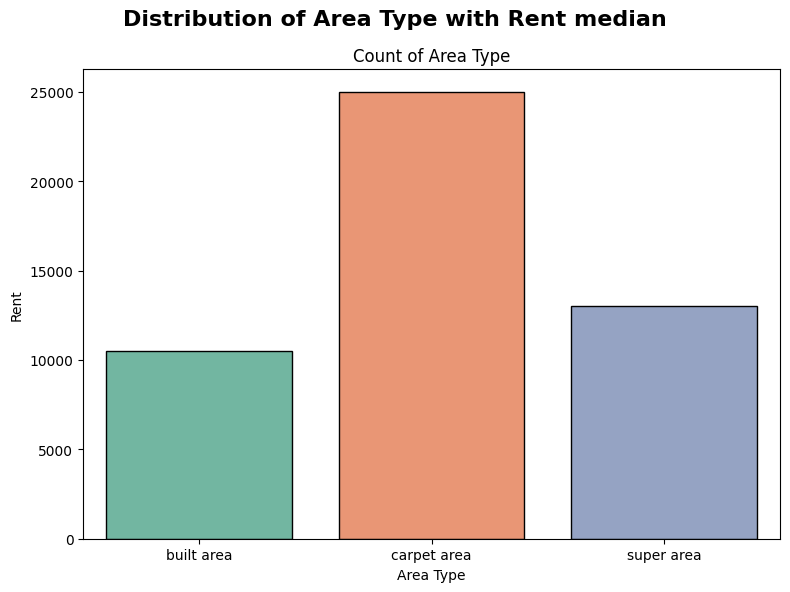

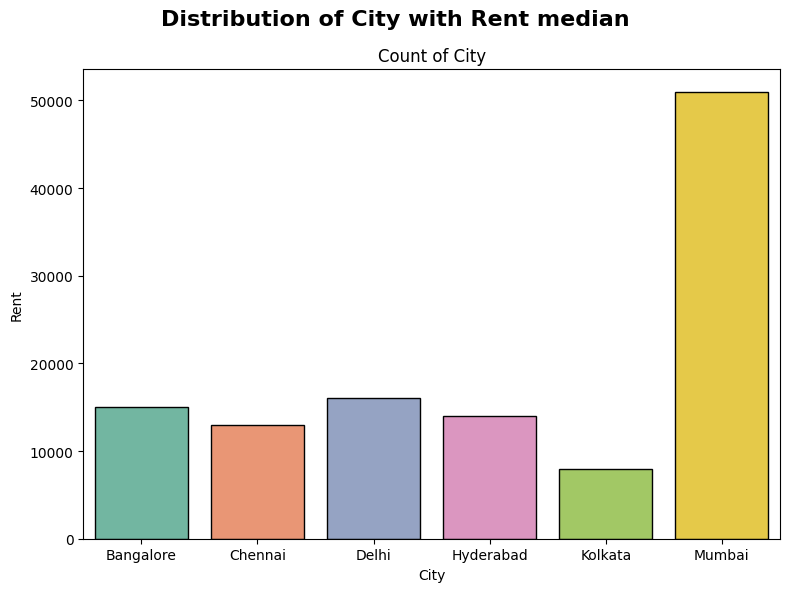

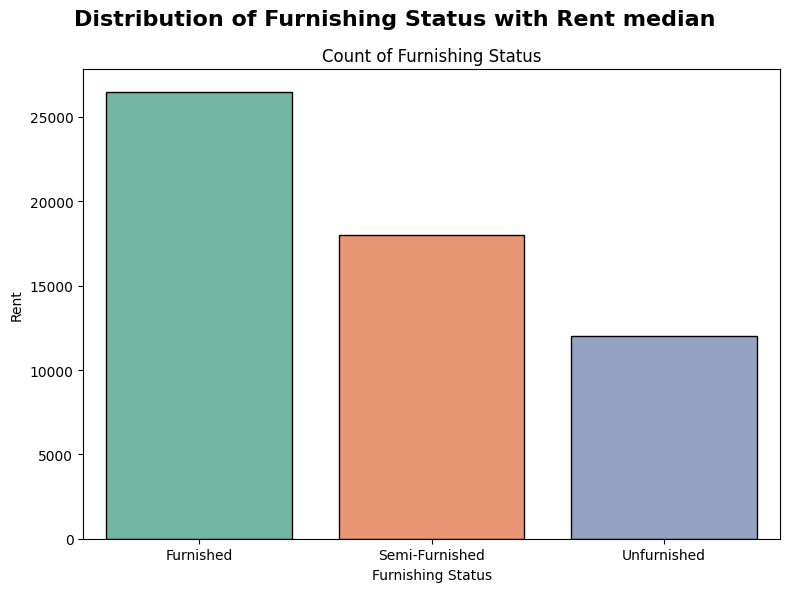

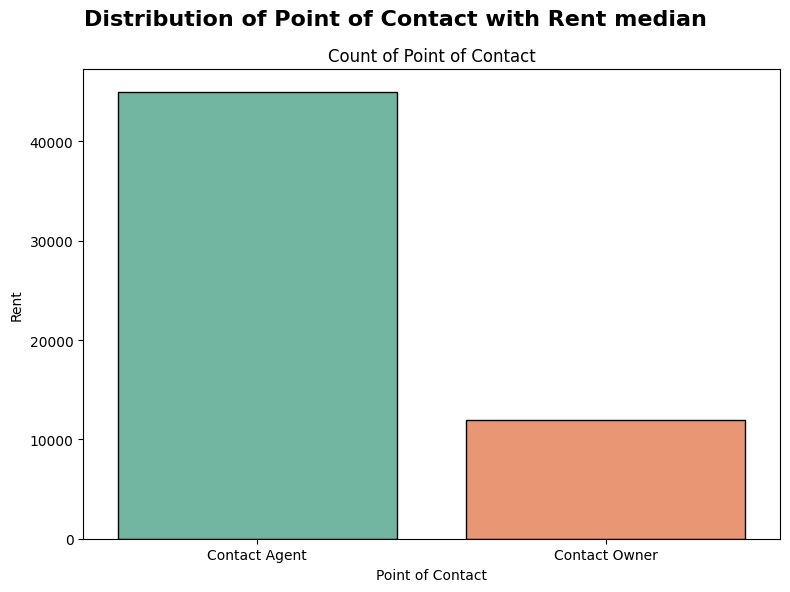

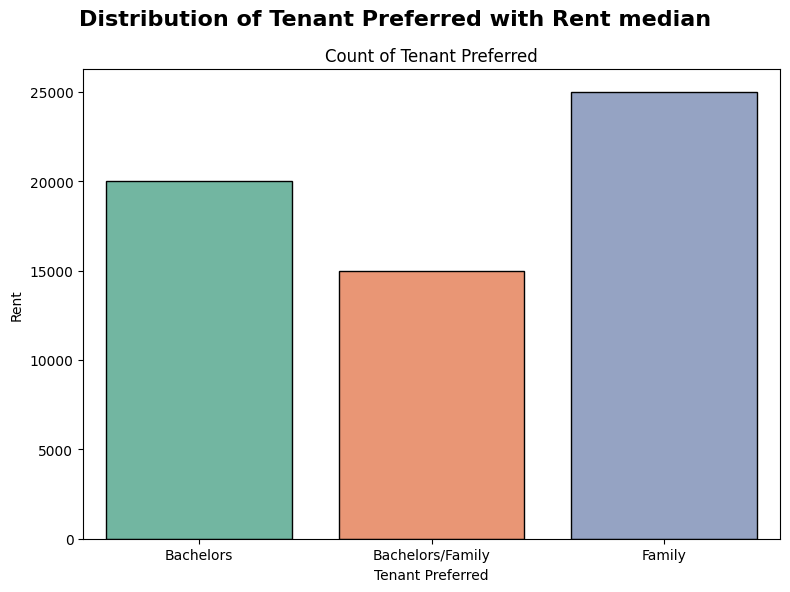

In [272]:
for column in cat_cols.difference(['Posted On','Area Locality']):
  cat_with_rent(column)

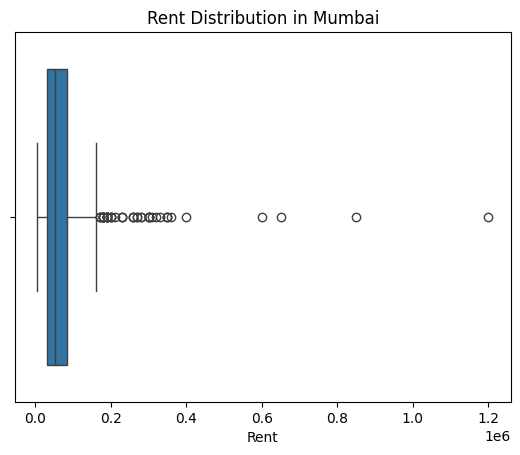

In [273]:
sns.boxplot(x=df.loc[df['City'] == 'Mumbai', 'Rent'])
plt.title("Rent Distribution in Mumbai")
plt.show()

In [274]:
df.loc[df['City'] == 'Mumbai']

,Posted On,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Floor_number,Total_floors
526,2022-05-26,1.0,450.0,carpet area,"Rose Queen, Old Khar",Mumbai,Furnished,Bachelors/Family,1.0,Contact Agent,45000,7.0,10.0
527,2022-05-27,NaN,1100.0,carpet area,"Sabari Palm View, Chembur",Mumbai,Unfurnished,Family,NaN,Contact Agent,75000,2.0,13.0
528,2022-06-07,1.0,640.0,super area,Mira Road,Mumbai,Furnished,Bachelors/Family,1.0,Contact Owner,14000,6.0,7.0
532,2022-06-08,1.0,460.0,super area,Sion,Mumbai,Unfurnished,Bachelors/Family,NaN,NaN,22000,2.0,8.0
534,2022-06-02,1.0,480.0,carpet area,Sion Hospital Colony,Mumbai,NaN,Bachelors,2.0,Contact Agent,33000,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,2022-07-09,3.0,1100.0,carpet area,Waterfield Road,Mumbai,Semi-Furnished,Bachelors/Family,3.0,NaN,140000,6.0,12.0
1486,2022-05-27,2.0,NaN,super area,Borivali East,Mumbai,Semi-Furnished,Bachelors/Family,2.0,Contact Owner,40000,1.0,3.0
1491,NaN,2.0,960.0,carpet area,"Dosti Ambrosia, Wadala East",Mumbai,Semi-Furnished,Bachelors/Family,2.0,Contact Agent,65000,16.0,38.0
1492,2022-06-21,2.0,1500.0,super area,in Sion,Mumbai,NaN,Bachelors/Family,3.0,Contact Owner,65000,4.0,4.0


In [275]:
df.loc[df['Rent']==df['Rent'].max()]

,Posted On,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Floor_number,Total_floors
1837,2022-06-08,3.0,2500.0,carpet area,Marathahalli,NaN,Semi-Furnished,Bachelors,3.0,Contact Agent,3500000,4.0,4.0


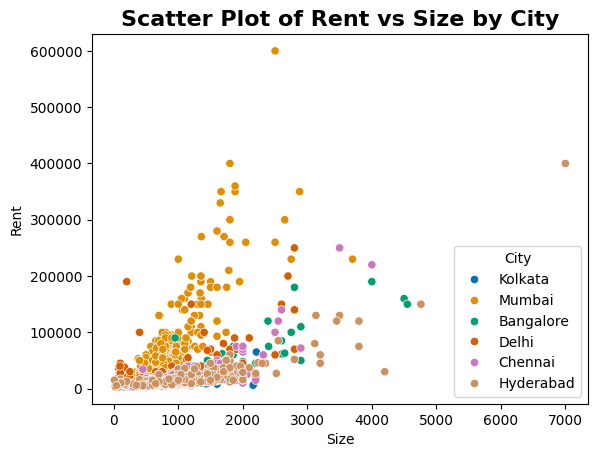

In [276]:
sns.scatterplot(x=df['Size'],y=df['Rent'],hue=df['City'],palette="colorblind",legend="full")
plt.title("Scatter Plot of Rent vs Size by City", fontsize=16, fontweight='bold')
plt.show()

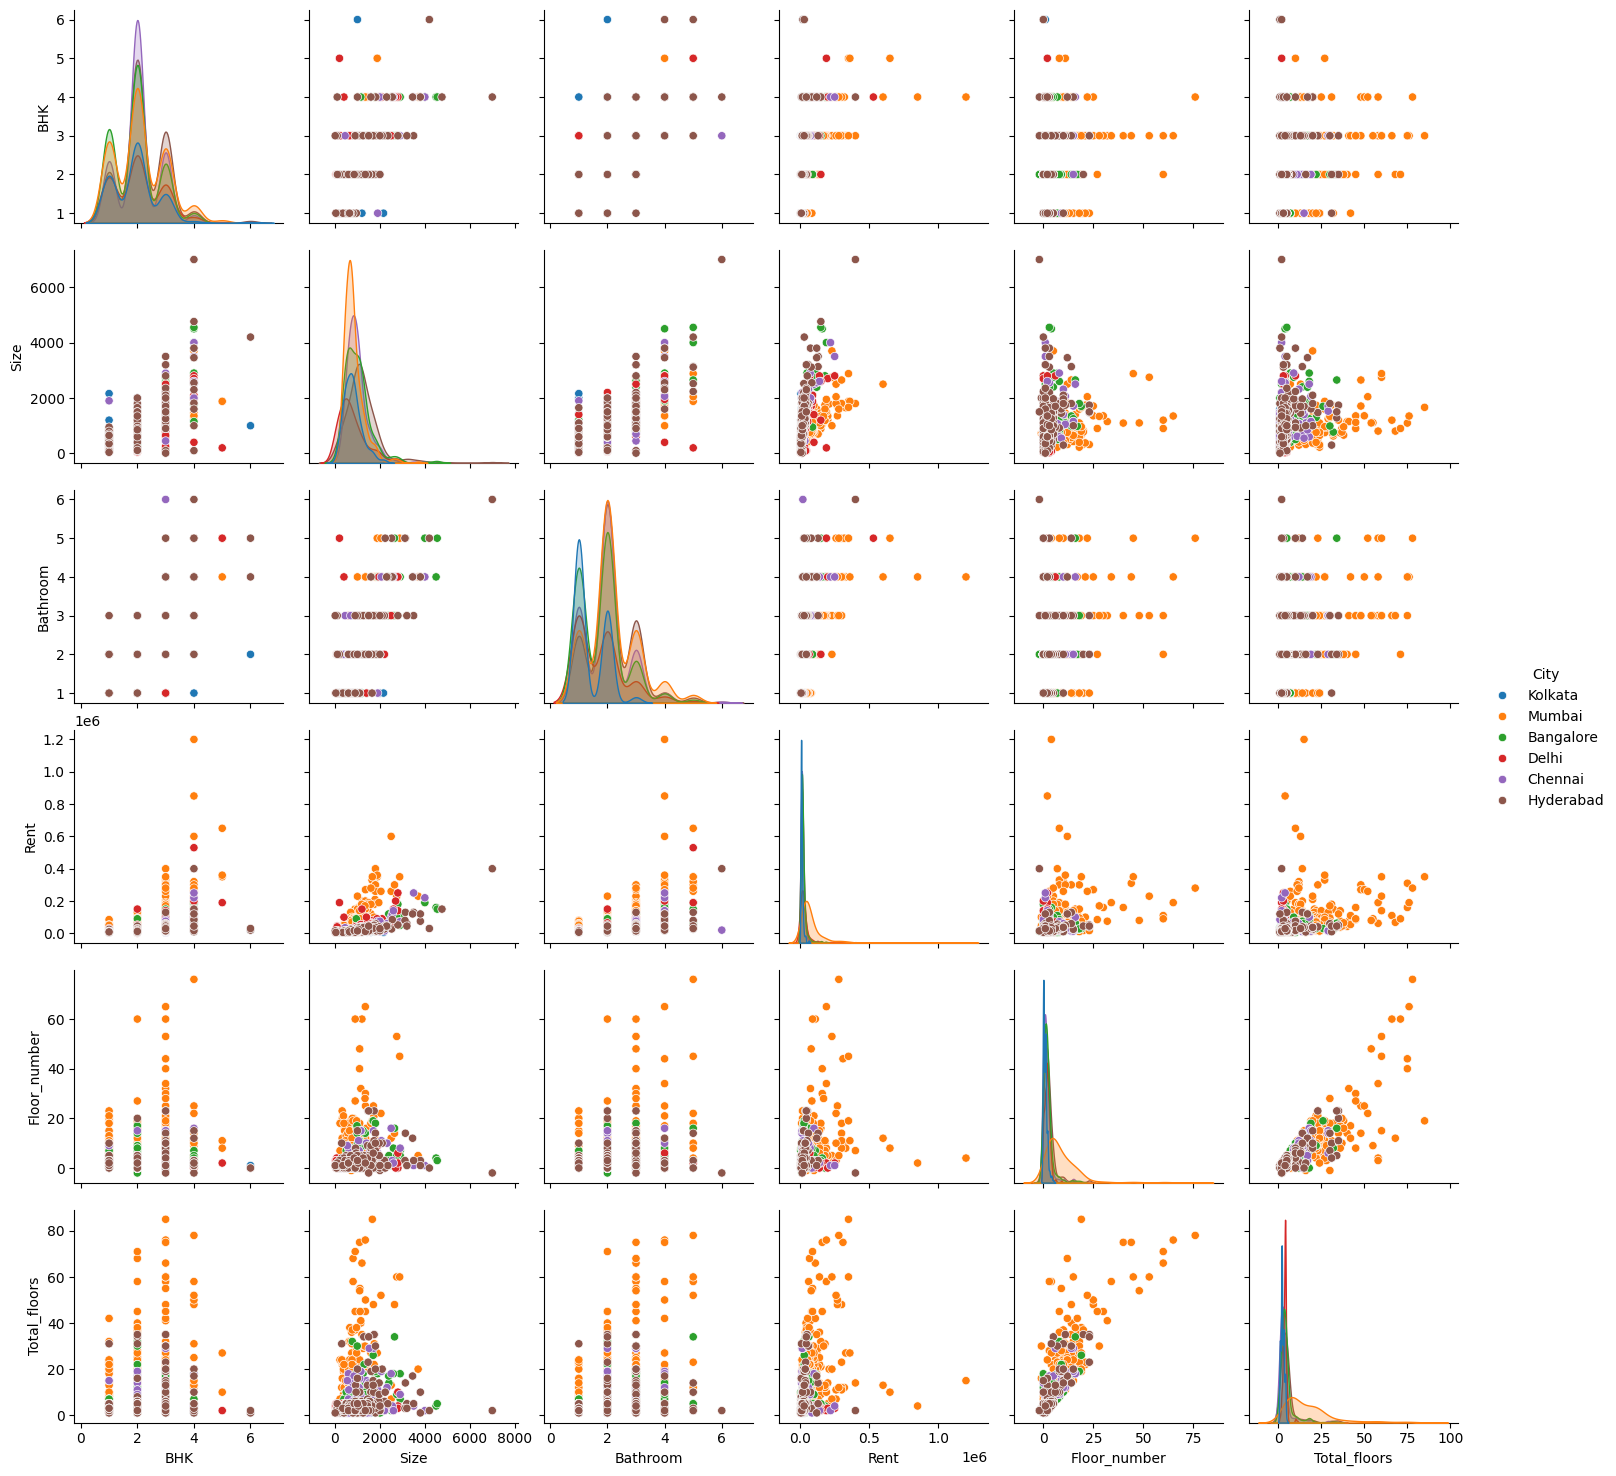

In [277]:
sns.pairplot(df,hue='City',diag_kind='kde')
plt.show()

# 5.Feture Engineering

In [278]:
# The data set in the same year so we will extract the month from it to be more useful
df['Month'] = pd.to_datetime(df['Posted On']).dt.month
df['Month'].value_counts()

,count
Month,
6.0,1589
5.0,1460
7.0,840
4.0,195


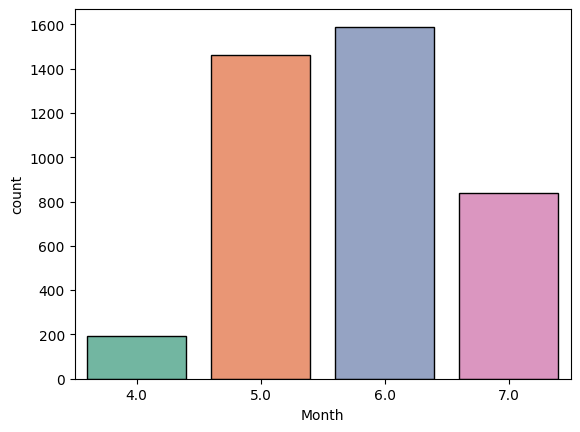

In [279]:
# Visulise count of the Month column
sns.countplot(x='Month', data=df, edgecolor='black',palette = "Set2")
plt.show()

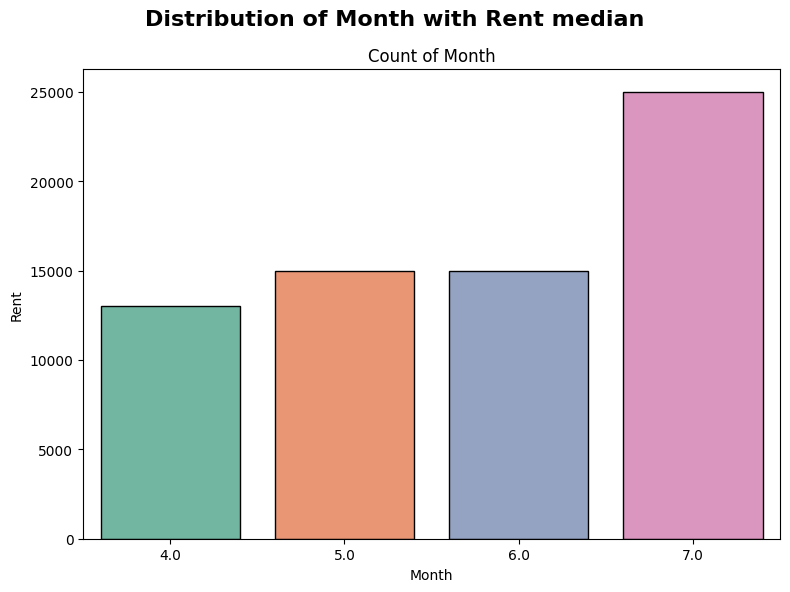

In [280]:
cat_with_rent('Month')

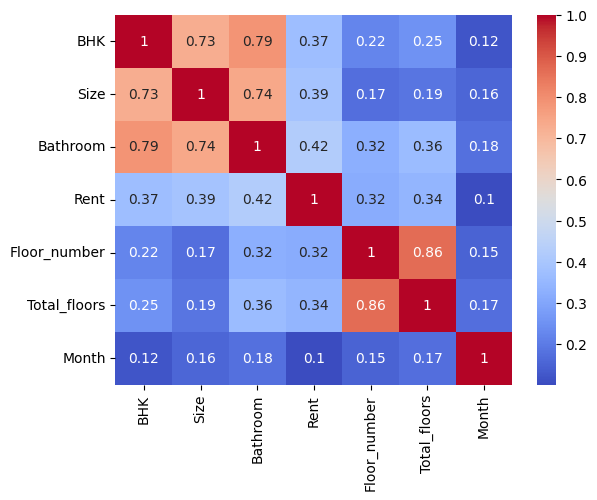

In [281]:
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True, cmap='coolwarm')
plt.show()

### outliers:

In [282]:
# After eda we notice the max rent raw with anthor raws in the same condition less than it in rent price
df.loc[df['Rent'] >= 1000000 ,'Rent'] = df.loc[df['Rent'] >= 1000000 ,'Rent']/10

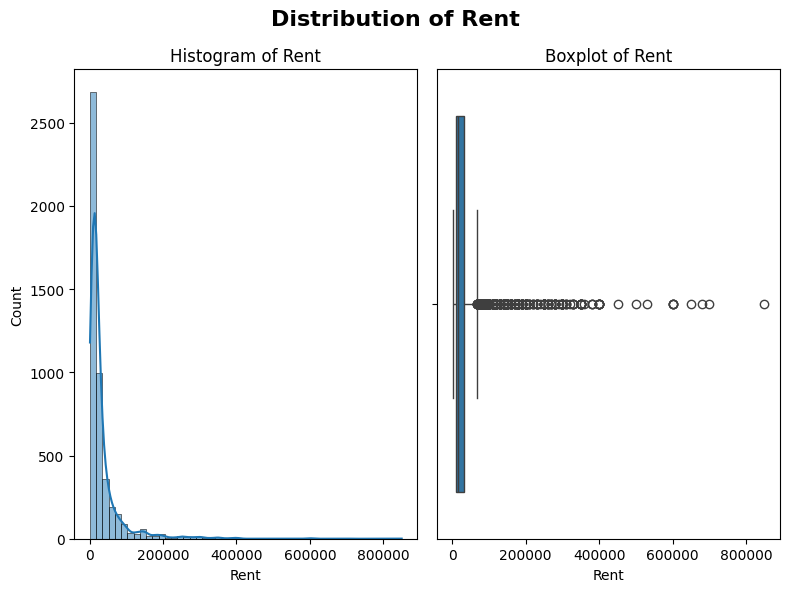

In [283]:
num_plot('Rent')

In [284]:
df.columns

Index(['Posted On', 'BHK', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Rent', 'Floor_number', 'Total_floors', 'Month'],
      dtype='object')

# 6. Preprosseing

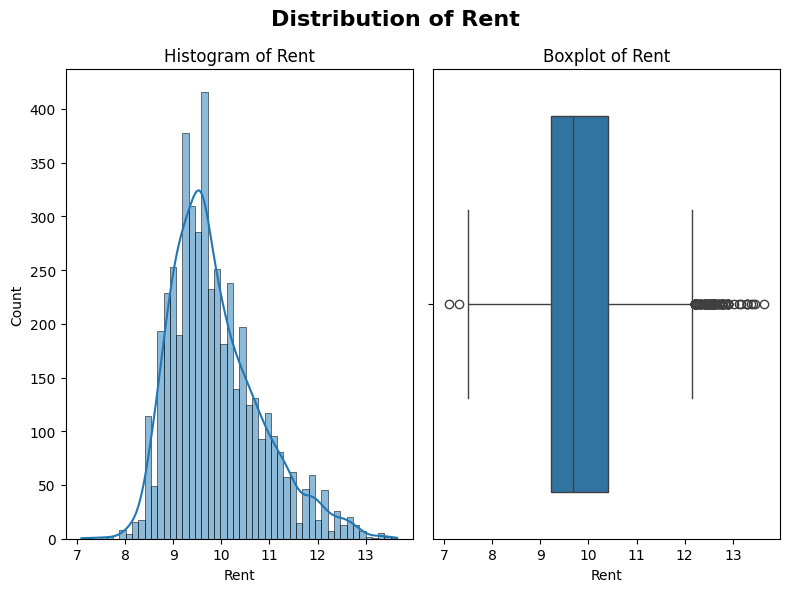

In [285]:
# After eda there is many features has right skweed so we will scale the data with log1p
log1p_col = ['Rent','Size','Total_floors']
for col in log1p_col:
  df[col] = np.log1p(df[col])

num_plot('Rent')

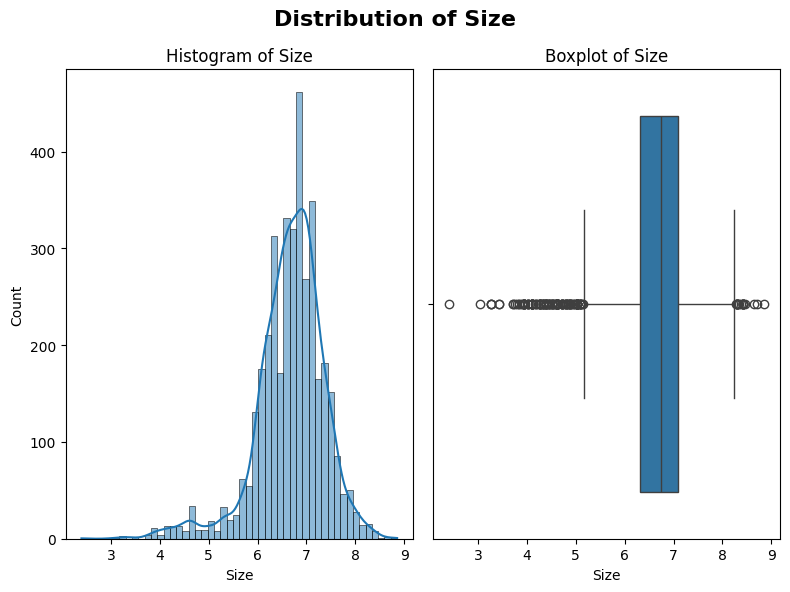

In [286]:
num_plot('Size')

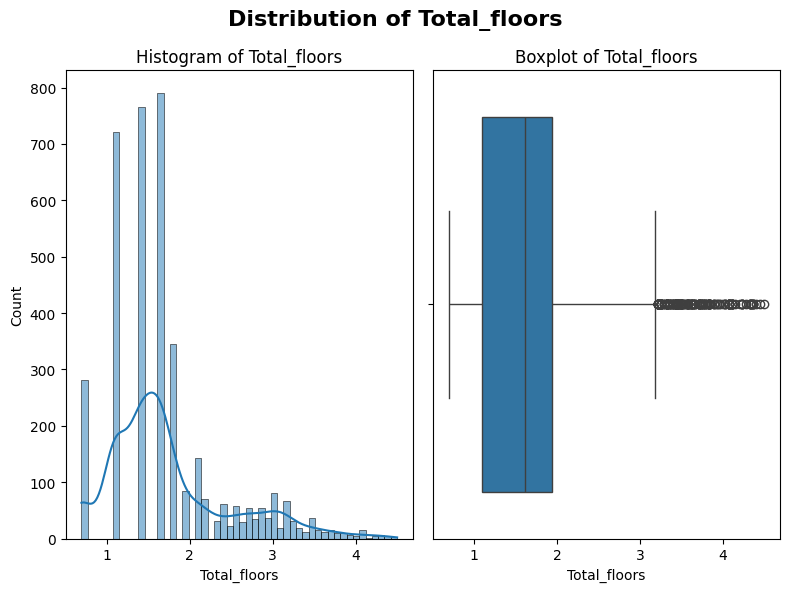

In [287]:
num_plot('Total_floors')

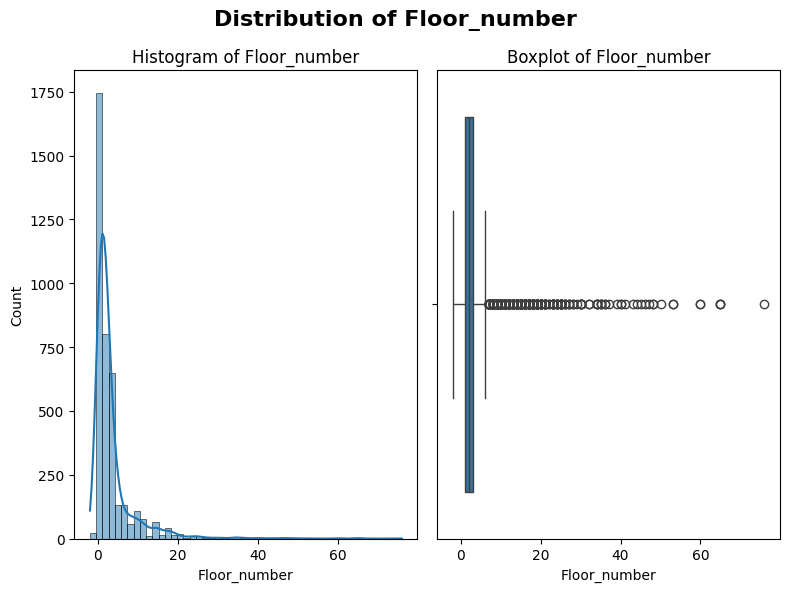

In [288]:
num_plot('Floor_number')

# 7.Modeling

In [289]:
# Split the data
from sklearn.model_selection import train_test_split
X = df.drop(['Rent','Posted On'],axis=1)     # Drop the 'Posted On' Because it not nessery now
y = df['Rent']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [290]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

num_features = ['BHK','Size','Bathroom','Floor_number','Total_floors','Month']
cat_features = ['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']

# Pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [291]:
# Model
from sklearn.linear_model import LinearRegression
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)           # Training the model
# Predict the columns
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

In [292]:
# Display the performance of the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.2f}")

Test RMSE: 35025.31
Test MAE: 13963.67
Test R²: 0.52


In [293]:
from sklearn.ensemble import RandomForestRegressor
model_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Train
model_rf.fit(X_train, y_train)

# Predict
y_pred_log_rf = model_rf.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)

In [294]:
rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_rf))
mae_rf = mean_absolute_error(y_test_original, y_pred_rf)
r2_rf = r2_score(y_test_original, y_pred_rf)

print(f"RandomForest RMSE: {rmse_rf:.2f}")
print(f"RandomForest MAE: {mae_rf:.2f}")
print(f"RandomForest R²: {r2_rf:.2f}")

RandomForest RMSE: 31166.24
RandomForest MAE: 13514.22
RandomForest R²: 0.62


In [295]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ))
])

model_gb.fit(X_train, y_train)
y_pred_log_gb = model_gb.predict(X_test)
y_pred_gb = np.expm1(y_pred_log_gb)

In [296]:
rmse_gb = np.sqrt(mean_squared_error(y_test_original, y_pred_gb))
mae_gb = mean_absolute_error(y_test_original, y_pred_gb)
r2_gb = r2_score(y_test_original, y_pred_gb)

print(f"GradientBoosting RMSE: {rmse_gb:.2f}")
print(f"GradientBoosting MAE: {mae_gb:.2f}")
print(f"GradientBoosting R²: {r2_gb:.2f}")

GradientBoosting RMSE: 31183.11
GradientBoosting MAE: 13248.85
GradientBoosting R²: 0.62


In [297]:
from xgboost import XGBRegressor

model_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

# Train
model_xgb.fit(X_train, y_train)

# Predict
y_pred_log_xgb = model_xgb.predict(X_test)
y_pred_xgb = np.expm1(y_pred_log_xgb)

In [298]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_original, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_original, y_pred_xgb)
r2_xgb = r2_score(y_test_original, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.2f}")

XGBoost RMSE: 31281.30
XGBoost MAE: 13157.00
XGBoost R²: 0.62


In [299]:
from sklearn.svm import SVR
model_svr = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', SVR(
        kernel='rbf',
        C=100,
        gamma='scale',
        epsilon=0.1
    ))
])

# Train
model_svr.fit(X_train, y_train)

# Predict
y_pred_log_svr = model_svr.predict(X_test)
y_pred_svr = np.expm1(y_pred_log_svr)

In [300]:
rmse_svr = np.sqrt(mean_squared_error(y_test_original, y_pred_svr))
mae_svr = mean_absolute_error(y_test_original, y_pred_svr)
r2_svr = r2_score(y_test_original, y_pred_svr)

print(f"SVR RMSE: {rmse_svr:.2f}")
print(f"SVR MAE: {mae_svr:.2f}")
print(f"SVR R²: {r2_svr:.2f}")

SVR RMSE: 64755.17
SVR MAE: 19103.99
SVR R²: -0.64


I will fine tune the XGBoost

In [301]:
from sklearn.model_selection import RandomizedSearchCV
xgb_model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    ))
])

param_dist = {
    'regressor__n_estimators': [200, 300, 500, 800],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__subsample': [0.7, 0.8, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 1.0],
    'regressor__min_child_weight': [1, 3, 5]
}
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV RMSE:", -random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'regressor__subsample': 0.8, 'regressor__n_estimators': 800, 'regressor__min_child_weight': 1, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.01, 'regressor__colsample_bytree': 0.8}
Best CV RMSE: 0.4947645435202593


In [302]:
best_model = random_search.best_estimator_
y_pred_log_best = best_model.predict(X_test)
y_pred_best = np.expm1(y_pred_log_best)

rmse_best = np.sqrt(mean_squared_error(y_test_original, y_pred_best))
mae_best = mean_absolute_error(y_test_original, y_pred_best)
r2_best = r2_score(y_test_original, y_pred_best)

print(f"Test RMSE: {rmse_best:.2f}")
print(f"Test MAE: {mae_best:.2f}")
print(f"Test R²: {r2_best:.2f}")

Test RMSE: 31096.81
Test MAE: 12859.35
Test R²: 0.62


In [303]:
from scipy import stats
import numpy as np

def rmse(errors):
    return np.sqrt(np.mean(errors**2))

def mae(errors):
    return np.mean(np.abs(errors))

errors = y_pred_best - y_test_original
confidence = 0.95
rng = np.random.default_rng(42)

# RMSE CI
boot_rmse = stats.bootstrap([errors], rmse, confidence_level=confidence, random_state=rng)
print("RMSE 95% CI:", boot_rmse.confidence_interval)

# MAE CI
boot_mae = stats.bootstrap([errors], mae, confidence_level=confidence, random_state=rng)
print("MAE 95% CI:", boot_mae.confidence_interval)

RMSE 95% CI: ConfidenceInterval(low=np.float64(26140.93346466565), high=np.float64(38159.909571143406))
MAE 95% CI: ConfidenceInterval(low=np.float64(11253.379030097609), high=np.float64(14948.16825041022))
